In [1]:
'''
【课程2.4】  数据连续属性离散化

连续属性变换成分类属性，即连续属性离散化
在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值

等宽法 / 等频法 

'''

'\n【课程2.4】  数据连续属性离散化\n\n连续属性变换成分类属性，即连续属性离散化\n在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值\n\n等宽法 / 等频法 \n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
# 等宽法 → 将数据均匀划分成n等份，每份的间距相等
# cut方法

ages=[20,22,25,27,21,23,37,31,60,45,41,32]
# 有一组人员年龄数据，希望将这些数据划分为“18到25”,“26到35”,“36到60”,“60以上”几个面元

bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats.codes)
print(cats.categories)
print(pd.value_counts(cats))

[0 0 0 1 0 0 2 1 2 2 2 1]
Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')
(18, 25]     5
(35, 60]     4
(25, 35]     3
(60, 100]    0
dtype: int64


    ages     label
0     20  (18, 25]
1     22  (18, 25]
2     25  (18, 25]
3     27  (25, 35]
4     21  (18, 25]
5     23  (18, 25]
6     37  (35, 60]
7     31  (25, 35]
8     60  (35, 60]
9     45  (35, 60]
10    41  (35, 60]
11    32  (25, 35]
(18, 25]     5
(25, 35]     3
(35, 60]     4
(60, 100]    0
Name: ages, dtype: int64


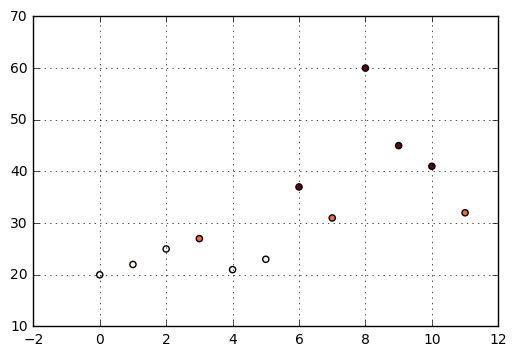

In [18]:
ages=[20,22,25,27,21,23,37,31,60,45,41,32]
df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'],bins)  # 也可以 pd.cut(df['ages'],5),将数据等分为5份
df['label'] = s
cut_counts = s.value_counts(sort=False) 
print(df)
print(cut_counts)
# 对一个Dataframe数据进行离散化，并计算各个区间的数据计数



plt.scatter(df.index,df['ages'],cmap = 'Reds',c = cats.codes)
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象

0     (-0.026, 0.633]
1     (-0.026, 0.633]
2    (-0.737, -0.026]
3    [-3.154, -0.737]
4      (0.633, 2.872]
dtype: category
Categories (4, object): [[-3.154, -0.737] < (-0.737, -0.026] < (-0.026, 0.633] < (0.633, 2.872]]
(0.633, 2.872]      250
(-0.026, 0.633]     250
(-0.737, -0.026]    250
[-3.154, -0.737]    250
dtype: int64
------


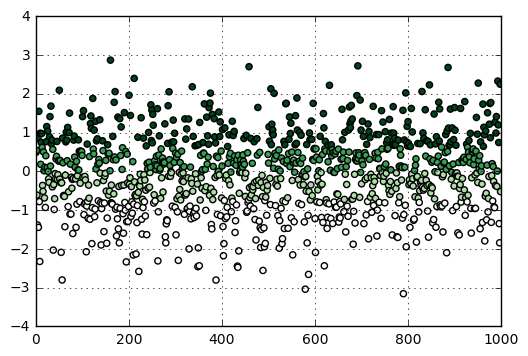

In [19]:
# 等频法 → 以相同数量的记录放进每个区间
# qcut方法

data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s,4)  # 按四分位数进行切割，可以试试 pd.qcut(data,10)
print(cats.head())
print(pd.value_counts(cats))
print('------')
# qcut → 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数
# 也可以设置自定义的分位数（0到1之间的数值，包含端点） → pd.qcut(data1,[0,0.1,0.5,0.9,1])

plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes)
plt.xlim([0,1000])
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象